In [1]:
# https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/
# https://webapps.stackexchange.com/questions/58615/export-all-sheets-in-a-spreadsheet-to-csv-in-google-apps
# https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import seaborn as sns

In [2]:
all_classes = []
for x in range(1, 17):
    file = "./conf_mat_folder_ucf/" + str(x) + ".csv"
    csvreader = csv.reader(open(file, "r"), delimiter=',')
    header = []
    header = next(csvreader)
    header.pop(0)
    all_classes = all_classes + header
all_classes = list(dict.fromkeys(all_classes))
#all_classes.remove("")
all_classes = sorted(all_classes)
print(len(all_classes))

101


In [3]:
dimensions = (101, 101)
conf_mat = np.zeros(dimensions) # 3x3 zeros matrix
df = pd.DataFrame(conf_mat, index=all_classes, columns=all_classes)

In [ ]:
#df.to_csv('final_cm_hmdb51.csv')

In [4]:
for x in range(1, 17):
    print(x)
    file = "./conf_mat_folder_ucf/" + str(x) + ".csv"
    split_cf = pd.read_csv(file,index_col='class')
    for x in range(0, 50):
        for y in range(0, 50):
            value = split_cf.iloc[x,y]
            col = split_cf.columns[x]
            row = split_cf.index[y]
            df.loc[row, col] = df.loc[row, col] + value

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [5]:
df.round(0)
df

Apply Eye Makeup  Apply Lipstick  Archery  Baby Crawling  \
Apply Eye Makeup               608.0           172.0      0.0            0.0   
Apply Lipstick                  32.0           480.0      0.0            0.0   
Archery                          0.0             0.0    290.0            0.0   
Baby Crawling                    1.0             1.0      1.0          977.0   
Balance Beam                     0.0             0.0      0.0            1.0   
...                              ...             ...      ...            ...   
Volleyball Spiking               0.0             0.0      0.0            0.0   
Walking With Dog                 0.0             0.0     90.0           18.0   
Wall Pushups                     0.0             0.0      0.0            2.0   
Writing On Board                 0.0             0.0      2.0            0.0   
Yo Yo                            0.0             0.0     85.0            0.0   

                    Balance Beam  Band Marching  Baseball Pitch  \
Apply Eye Makeup             0.0            0.0             0.0   
Apply Lipstick               0.0            0.0             0.0   
Archery                      0.0            6.0            10.0   
Baby Crawling                0.0            7.0             0.0   
Balance Beam               603.0            0.0             0.0   
...                          ...            ...             ...   
Volleyball Spiking           1.0            0.0             6.0   
Walking With Dog             0.0          148.0             0.0   
Wall Pushups                 0.0            0.0             1.0   
Writing On Board             0.0            0.0             2.0   
Yo Yo                        0.0            0.0             0.0   

                    Basketball Dunk  Basketball Shooting  Bench Press  ...  \
Apply Eye Makeup                0.0                  0.0          0.0  ...   
Apply Lipstick                  0.0                  0.0          0.0  ...   
Archery                         0.0                  1.0          0.0  ...   
Baby Crawling                   0.0                  0.0          8.0  ...   
Balance Beam                    0.0                  0.0          0.0  ...   
...                             ...                  ...          ...  ...   
Volleyball Spiking              0.0                  0.0          0.0  ...   
Walking With Dog                0.0                  0.0          0.0  ...   
Wall Pushups                    0.0                  0.0          7.0  ...   
Writing On Board                0.0                  0.0          0.0  ...   
Yo Yo                           0.0                  0.0          0.0  ...   

                    Tennis Swing  Throw Discus  Trampoline Jumping  Typing  \
Apply Eye Makeup             0.0           0.0                 0.0     0.0   
Apply Lipstick               0.0           0.0                 0.0     7.0   
Archery                      4.0           0.0                 0.0     0.0   
Baby Crawling                0.0           0.0                 2.0    99.0   
Balance Beam                 0.0           0.0                 5.0     0.0   
...                          ...           ...                 ...     ...   
Volleyball Spiking           9.0          34.0                 6.0     0.0   
Walking With Dog             0.0           0.0                 0.0    23.0   
Wall Pushups                 0.0           0.0                 7.0     0.0   
Writing On Board             0.0           0.0                 0.0    61.0   
Yo Yo                        3.0           0.0                 0.0     0.0   

                    Uneven Bars  Volleyball Spiking  Walking With Dog  \
Apply Eye Makeup            0.0                 0.0               0.0   
Apply Lipstick              0.0                 0.0               0.0   
Archery                     0.0                 3.0               1.0   
Baby Crawling               0.0                 0.0               4.0   
Balance Beam   

In [6]:
df.round()
df.style.background_gradient(cmap ='RdYlBu')\
        .set_properties(**{'font-size': '10px'})

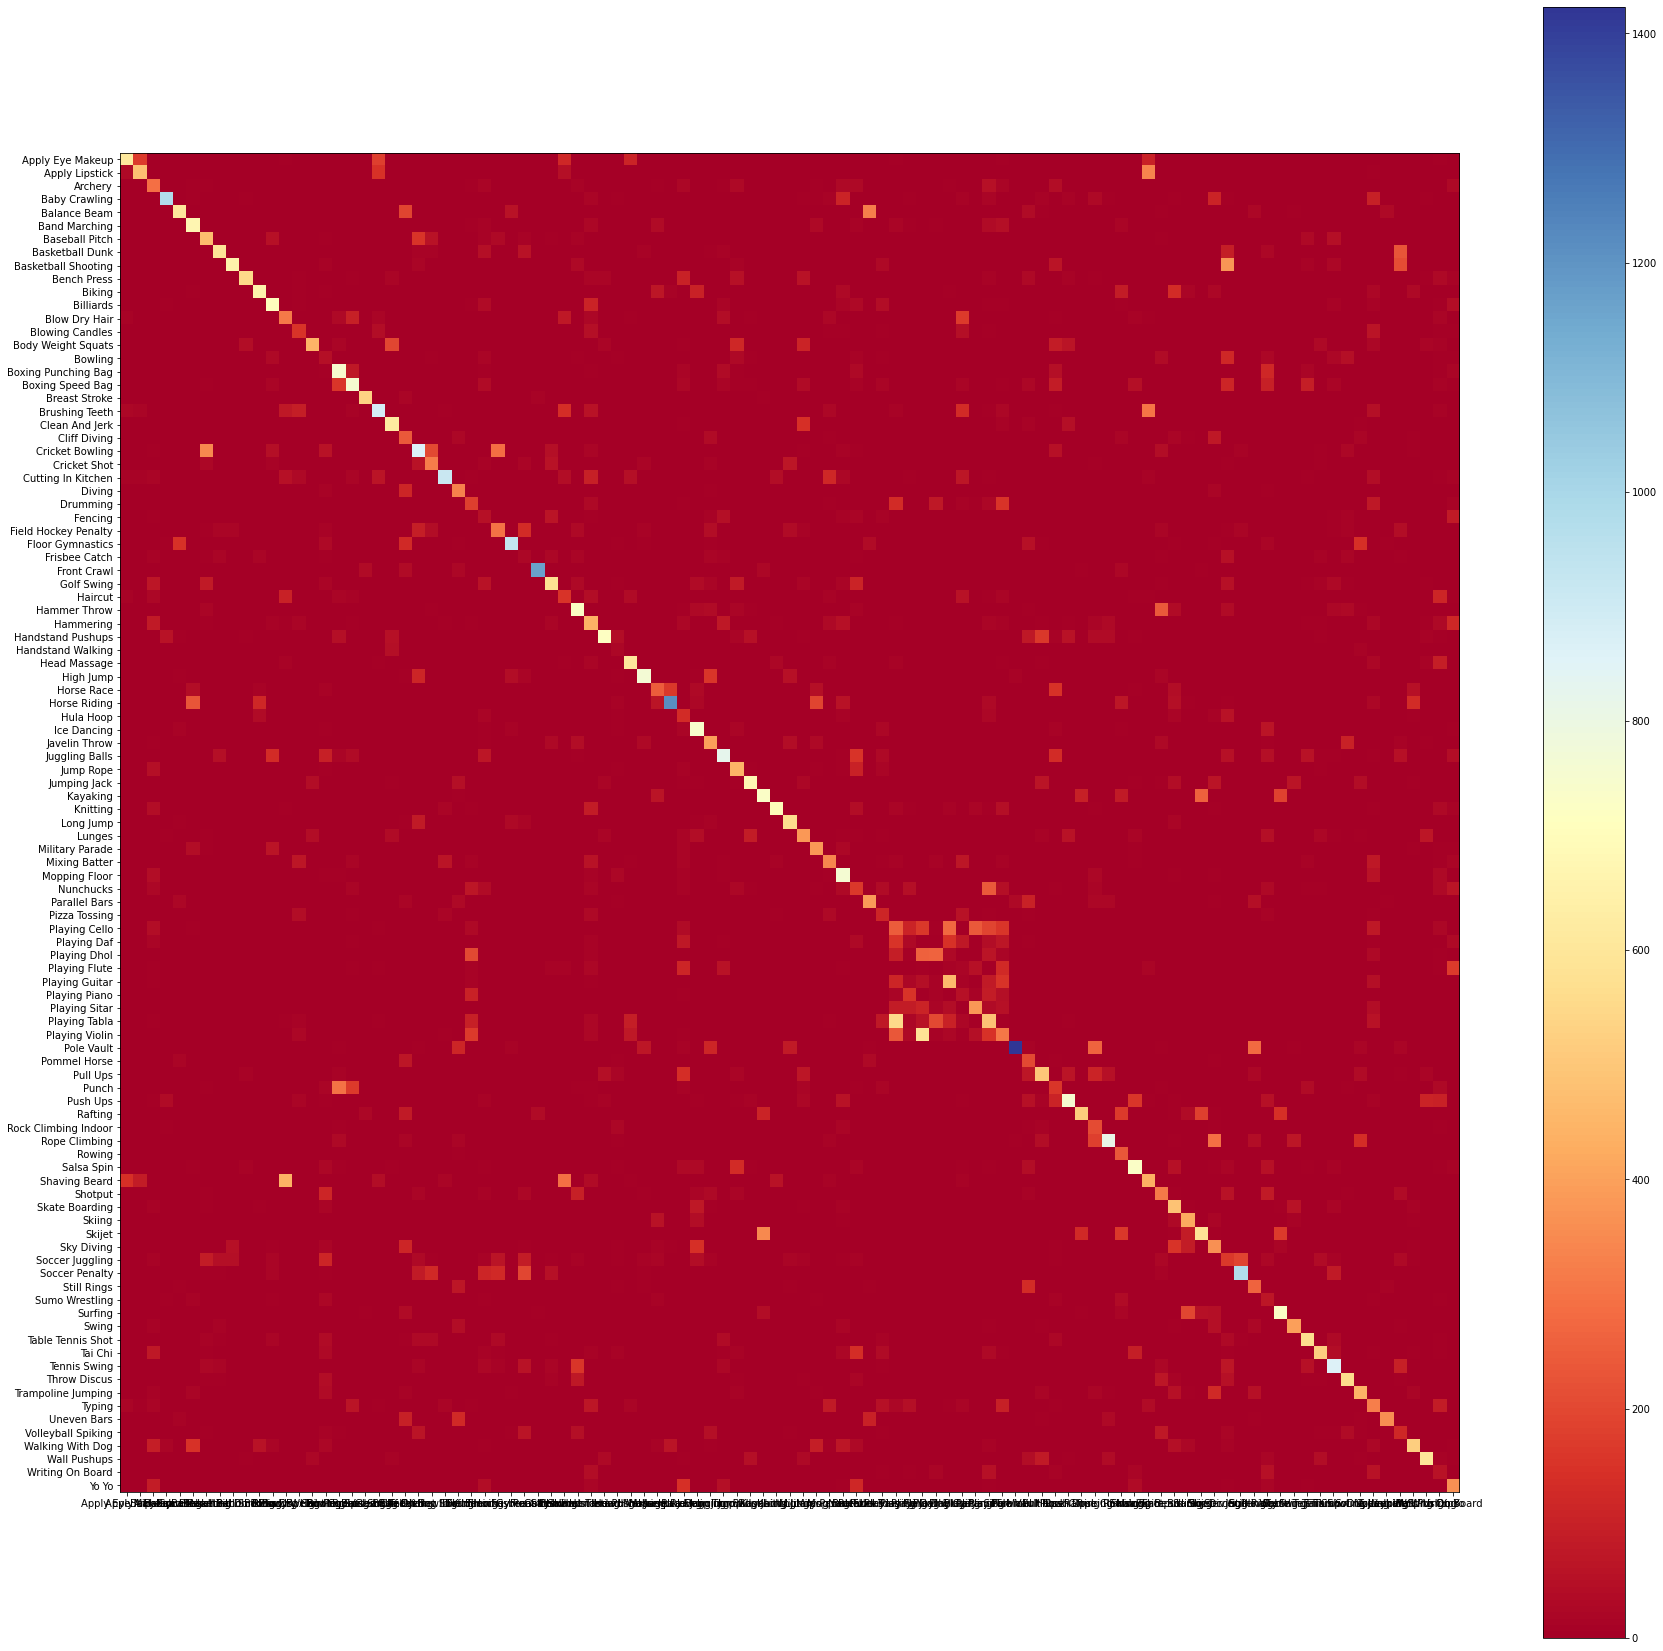

In [7]:
# Displaying dataframe as an heatmap
# with diverging colourmap as RdYlBu
plt.rcParams["figure.figsize"] = (30,30)
plt.imshow(df, cmap ="RdYlBu")
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
# according to dataframe
plt.xticks(range(len(df)), df.columns)
  
# Assigning labels of y-axis 
# according to dataframe
plt.yticks(range(len(df)), df.index)
  
# Displaying the figure
plt.show()

In [8]:
df.style.background_gradient(cmap='Blues')

In [9]:
df.to_csv('combined_confusion_matrix_ucf.csv')

In [108]:
file = "combined_confusion_matrix_hmdb.csv"
#file = "combined_confusion_matrix_ucf.csv"
df = pd.read_csv(file,index_col='class',delimiter=',')
#df.iloc[:] <=100
#df.loc[df.catch <= 100,:]

#for cls in df.index:
 #   print(df[cls]>=100)
  #  df = df[df[cls]>=100]
df = df[df['brush hair']>=100]

#df.to_csv('cm_hmdb_small_value.csv')
df

brush hair  cart wheel  catch  chew  clap  climb  climb stairs  \
class                                                                         
brush hair          626           0      0    20    33     10             2   
chew                155           0      0   694    58      0             1   
eat                 119           0      0    78    40      0             0   
kiss                135           0      0     4    54      0             4   
shake hands         169           0      6     1    18      4             1   

             dive  draw sword  dribble  ...  somersault  stand  \
class                                   ...                      
brush hair      0           2        0  ...           0     93   
chew            0           3        0  ...           0     23   
eat             0           2        0  ...           0     36   
kiss            1           7        0  ...           0     85   
shake hands     0          24        1  ...           0     28   

             swing baseball  sword  sword exercise  talk  throw  turn  walk  \
class                                                                         
brush hair                3      4               0    53     14    69   223   
chew                      8      0               0    92      0    33    12   
eat                       6      0               1   156      2    67    19   
kiss                      2      0               1    12     17    77   258   
shake hands               0     12               0    14     12    86    48   

             wave  
class              
brush hair     29  
chew           40  
eat            26  
kiss           58  
shake hands    18  

[5 rows x 51 columns]

In [109]:
file = "nice_plot2.csv"
full_mat = pd.read_csv(file,index_col='class',delimiter=';')
full_mat

brush hair  cart wheel  catch    chew    clap   climb  \
class                                                                   
brush hair             626           0      0    20.0    33.0    10.0   
cart wheel               0        1293     23     0.0     3.0     5.0   
catch                   16           1     20     0.0     4.0    13.0   
chew                   155           0      0   694.0    58.0     0.0   
clap                    87           0      0     7.0   897.0     0.0   
climb                    6          16      1     0.0     2.0   259.0   
climb stairs             1           0      0     0.0     3.0    52.0   
dive                     0          43     43     0.0     0.0    74.0   
draw sword              22           2      2     0.0    37.0     6.0   
dribble                  2           0    268     0.0     1.0    33.0   
drink                   85           0      0    82.0    77.0     1.0   
eat                    119           0      0    78.0    40.0     0.0   
fall floor              17           0      0     0.0    10.0   337.0   
fencing                  1           0      4     0.0     5.0     6.0   
flic flac                4           0      1     0.0     2.0     6.0   
golf                     1           1     90     0.0    10.0     6.0   
hand stand               0          17      7     0.0     2.0    88.0   
hit                      5           0     17     0.0     2.0    96.0   
hug                     28           0      0     1.0    31.0    11.0   
jump                     0           5      6     0.0     0.0   229.0   
kick                     1           6     85     0.0     9.0    37.0   
kick ball                0           0    500     0.0     4.0    10.0   
kiss                   135           0      0     4.0    54.0     0.0   
laugh                   78           0      1   212.0    28.0    10.0   
pick                     2           0      0     0.0     4.0     8.0   
pour                    29           0      0     1.0    14.0     1.0   
pullup                  11           0     77     0.0    16.0    34.0   
punch                   44           0      0     0.0     0.0    57.0   
push                     5           1      0     2.0     2.0    13.0   
pushup                  18           0     10     0.0     7.0   136.0   
ride bike                1           1      5     0.0     4.0    35.0   
ride horse               0           0      0     0.0     0.0    10.0   
run                      1           0     19     1.0     3.0    34.0   
shake hands            169           0      6     1.0    18.0     4.0   
shoot ball               0           0    370     0.0     2.0    38.0   
shoot bow                4           0     13     0.0     7.0    20.0   
shoot gun               29           0      5     0.0     5.0     0.0   
sit                     18           0      0     1.0     3.0    14.0   
situp                   45           0     10     5.0    20.0    68.0   
smile                   96           0      0    46.0   154.0     1.0   
smoke                   74           0      0     4.0    18.0    12.0   
somersault               0          72      0     0.0     4.0    83.0   
stand                   42           6      0     0.0     8.0    21.0   
swing baseball           0          34    339     0.0     5.0     1.0   
sword                   11           0      3     0.0     2.0     2.0   
sword exercise          10           0      0     0.0    11.0    20.0   
talk                    59           0      0    34.0     1.0     7.0   
throw                    2           0    104     0.0    14.0     8.0   
turn                    19           0      0     1.0     7.0    17.0   
walk                     1           0      2     0.0     1.0    11.0   
wave                    61           0      9     5.0    48.0     0.0   
NaN                   2140        1498   2040  1199.0  1690.0  1944.0   
NaN                  98392       34061  64331     NaN     NaN     NaN   

